In [37]:
import pandas as pd  



In [38]:
df=pd.read_excel("China.xlsx")

In [39]:
df

,Unnamed: 0,Person_ID,Hospitalised,Died,Year,Month,gender,Age,Education,Occupation,method
0,1,1,yes,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,2009,8,male,51,Secondary,farming,Pesticide
...,...,...,...,...,...,...,...,...,...,...,...
2566,2567,2567,yes,no,2010,7,male,28,primary,household,Pesticide
2567,2568,2568,yes,no,2011,6,male,35,Secondary,farming,Pesticide
2568,2569,2569,yes,no,2011,9,female,22,Secondary,unemployed,Other poison
2569,2570,2570,yes,no,2010,8,female,50,Secondary,farming,Pesticide


In [40]:
df.isnull().sum()

Unnamed: 0       0
Person_ID        0
Hospitalised     0
Died             0
Year             0
Month            0
gender           0
Age              0
Education        0
Occupation       0
method          33
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
df.columns

Index(['Unnamed: 0', 'Person_ID', 'Hospitalised', 'Died', 'Year', 'Month',
       'gender', 'Age', 'Education', 'Occupation', 'method'],
      dtype='object')

In [43]:
df.drop("Unnamed: 0",axis=1,inplace=True)

# hər il ölən və sağ qalan insanların sayı 

In [44]:
data=df.groupby(["Year","Died"]).count().reset_index()[["Year","Died","Person_ID"]]

In [45]:
data

,Year,Died,Person_ID
0,2009,no,418
1,2009,yes,324
2,2010,no,462
3,2010,yes,476
4,2011,no,420
5,2011,yes,438


In [46]:
import matplotlib.pyplot as plt


# ölən ə sağ qalan insanların sayının vizual səkildə göstərilməsi 

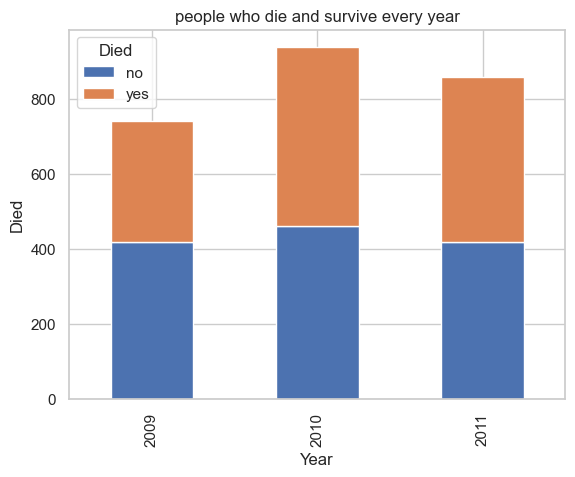

In [48]:
pivot_data = data.pivot(index='Year', columns='Died', values='Person_ID')

pivot_data.plot(kind='bar', stacked=True)


plt.xlabel('Year')
plt.ylabel('Died')
plt.title('people who die and survive every year')

plt.show()




# Ölən bütün insanlar arasında kişi və qadınların sayı 

In [51]:
data2=df[df["Died"]=="yes"].groupby(["gender"]).count().reset_index()[['gender',"Person_ID"]]

In [52]:
data2

,gender,Person_ID
0,female,579
1,male,659


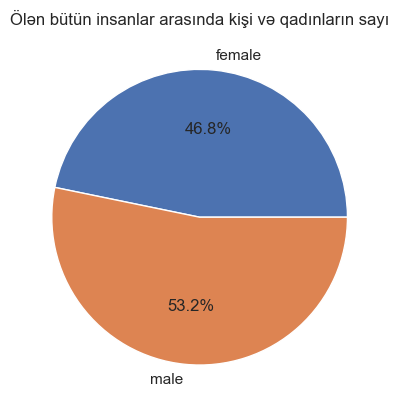

In [53]:
plt.pie(data2['Person_ID'], labels=data2['gender'], autopct='%1.1f%%')


plt.title('Ölən bütün insanlar arasında kişi və qadınların sayı')


plt.show()



# hər ay ölən insanların sayı 

In [54]:
data3=df[df["Died"]=="yes"].groupby(["Month"]).count().reset_index()[['Month',"Person_ID"]]

In [55]:
data3

,Month,Person_ID
0,1,99
1,2,104
2,3,112
3,4,105
4,5,135
5,6,125
6,7,101
7,8,88
8,9,105
9,10,109


In [59]:
data3.columns=["Month","death toll"]

In [60]:
import plotly.express as px

fig = px.line(data3, x="Month", y="death toll", title='')

fig.show()

# Hər il xəstəxanaya yerləşdirilib və yerləşdirilməyib ölənlərin sayı 

In [61]:
data4=df.groupby(["Year","Hospitalised"])["Person_ID"].count().reset_index()

In [62]:
data4

,Year,Hospitalised,Person_ID
0,2009,no,277
1,2009,yes,465
2,2010,no,388
3,2010,yes,550
4,2011,no,337
5,2011,yes,521


In [64]:
data4.columns=["Year","Hospitalised","death toll"]

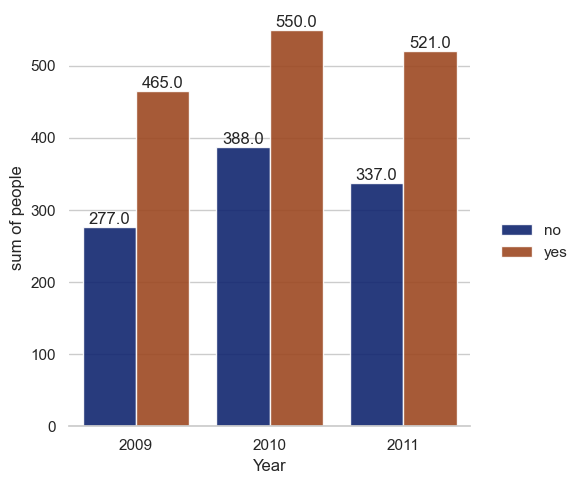

In [65]:
import seaborn as sns
sns.set_theme(style="whitegrid")

df2 = pd.DataFrame(data4)


g = sns.catplot(
    data=df2, kind="bar",
    x="Year", y="death toll", hue="Hospitalised",
    palette="dark", alpha=.9, height=5
)
g.despine(left=True)
g.set_axis_labels("Year", "sum of people")
g.legend.set_title("")

for p in g.ax.patches:
    g.ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


sns.despine(left=True)


plt.show()


In [66]:
def age(a) :
    col=a
    
    if a<=20:
        col="0-20"
    elif a<=40:
        col="20-40"
    elif a<=60:
        col="40-60"
    else :
        col="60-"
    return col
    

In [67]:
df['age']=df["Age"].apply(age)

In [68]:
df

,Person_ID,Hospitalised,Died,Year,Month,gender,Age,Education,Occupation,method,age
0,1,yes,no,2010,12,female,39,Secondary,household,Other poison,20-40
1,2,no,yes,2009,3,male,83,primary,farming,Hanging,60-
2,3,no,yes,2010,2,male,60,primary,farming,Hanging,40-60
3,4,no,yes,2011,1,male,73,primary,farming,Hanging,60-
4,5,yes,no,2009,8,male,51,Secondary,farming,Pesticide,40-60
...,...,...,...,...,...,...,...,...,...,...,...
2566,2567,yes,no,2010,7,male,28,primary,household,Pesticide,20-40
2567,2568,yes,no,2011,6,male,35,Secondary,farming,Pesticide,20-40
2568,2569,yes,no,2011,9,female,22,Secondary,unemployed,Other poison,20-40
2569,2570,yes,no,2010,8,female,50,Secondary,farming,Pesticide,40-60


# Yaş aralığına görə ölənlərin sayı 

In [69]:
data5=df.groupby(["age","gender"])["Person_ID"].count().reset_index()

In [70]:
data5

,age,gender,Person_ID
0,0-20,female,44
1,0-20,male,49
2,20-40,female,396
3,20-40,male,279
4,40-60,female,421
5,40-60,male,420
6,60-,female,451
7,60-,male,478


In [71]:
data5.columns=["age","gender","death toll"]

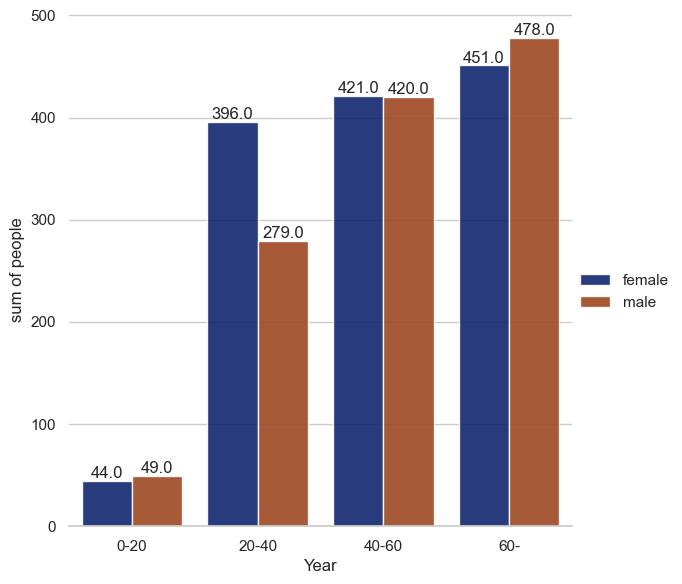

In [72]:
sns.set_theme(style="whitegrid")

df3 = pd.DataFrame(data5)


g = sns.catplot(
    data=df3, kind="bar",
    x="age", y="death toll", hue="gender",
    palette="dark", alpha=.9, height=6
    
)
g.despine(left=True)
g.set_axis_labels("Year", "sum of people")
g.legend.set_title("")

for p in g.ax.patches:
    g.ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


sns.despine(left=True)


plt.show()